In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## 03-04 data

In [ ]:
# read NHANES data: Vitamin A, Vitamin E & Carotenoids 2005-2006
derm_2003 = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/derm_2003.XPT')
# Dermatology_questionaire
dermatology_questionaire = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/dermatology_questionaire.XPT')
# Alcohol
alcohol = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/alcohol.XPT')
# demo_2003
demo_2003 = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/demo_2003.XPT')
# body_measure
body_measure = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/body_measure.XPT')
# Vitimin_ace
vitamin_ace = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/vitamin_ace.XPT')
# use_of_supplements
use_of_supplements = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/use_of_supplements.XPT')
# smoking
smoking = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/smoking.XPT')
# vitimin_d
vitimin_d = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/vitimin_d.XPT')
# CRP
CRP = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/CRP.XPT')
# Supplement_count
supplement_count  = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/supplement_count.XPT')
# physical_activity
physical_activity = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/physical_activity.XPT')
# SMQMEC_C  smoke
SMQMEC_C = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/SMQMEC_C.XPT')
# immunization
immunization = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/immunization.XPT')

<ipython-input-3-42d5dd1f5c0a>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  derm_2003 = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/derm_2003.XPT')
<ipython-input-3-42d5dd1f5c0a>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  derm_2003 = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/derm_2003.XPT')


aggregate all data from 03-04

In [ ]:

df_list_03 = [derm_2003,dermatology_questionaire,alcohol,demo_2003, body_measure,vitamin_ace, use_of_supplements, smoking, vitimin_d , CRP, supplement_count, physical_activity, SMQMEC_C, immunization]

merged_df_03 = df_list_03[0]

# Iterate through the list of DataFrames and join them based on 'common_column'
for df in df_list_03[1:]:
    merged_df_03 = pd.merge(merged_df_03, df, on='SEQN', how='left')

# Print the merged DataFrame
print('shape of merged_df', merged_df_03.shape)

# Check the number of null entries in each column
null_counts = merged_df_03.isnull().sum()



#only keep psoriasis related entries
df03 = merged_df_03[(merged_df_03['DEQ053']==1) | (merged_df_03['DEQ053']==2)]

# Display the resulting DataFrame
print('shape after drop', df03.shape)

#find target col
psoriasis_list = []
for index, row in df03.iterrows():
  if row['DEQ053'] == 1:
    psoriasis_list.append(1)
  else:
    psoriasis_list.append(0)
df03['psoriasis'] = psoriasis_list

df03['psoriasis'].value_counts()

shape of merged_df (10026, 364)
shape after drop (10011, 364)


<ipython-input-4-4990d1f10529>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df03['psoriasis'] = psoriasis_list


0    9710
1     301
Name: psoriasis, dtype: int64

## 05-06 data

In [ ]:
bodymeasure_0506 = pd.read_sas('/content/drive/MyDrive/Capstone/data_0506/Bodymeasure_0506.xpt')
alcohol_0506 = pd.read_sas('/content/drive/MyDrive/Capstone/data_0506/alcohol_0506.xpt')
crp_0506 = pd.read_sas('/content/drive/MyDrive/Capstone/data_0506/CRP_0506.xpt')
demo_0506 = pd.read_sas('/content/drive/MyDrive/Capstone/data_0506/DEMO_0506.xpt')
derma_0506 = pd.read_sas('/content/drive/MyDrive/Capstone/data_0506/derma_0506.xpt')
immune_0506 = pd.read_sas('/content/drive/MyDrive/Capstone/data_0506/IMMUNE_0506.xpt')
smoking_0506 = pd.read_sas('/content/drive/MyDrive/Capstone/data_0506/Smoking_0506.xpt')
vitae_0506 = pd.read_sas('/content/drive/MyDrive/Capstone/data_0506/VITAE_0506.xpt')
vitd_0506 = pd.read_sas('/content/drive/MyDrive/Capstone/data_0506/VITD_0506.xpt')

In [ ]:
df_list_05 =[bodymeasure_0506, alcohol_0506, crp_0506, demo_0506, derma_0506, immune_0506, smoking_0506, vitae_0506, vitd_0506]
merged_df_05 = df_list_05[0]


for df in df_list_05[1:]:
    merged_df_05 = pd.merge(merged_df_05, df, on='SEQN', how='left')


print('shape of merged_df', merged_df_05.shape)

#only keep psoriasis related entries
df05 = merged_df_05[(merged_df_05['DEQ053']==1) | (merged_df_05['DEQ053']==2)]



print('shape after drop', df05.shape)

shape of merged_df (9950, 154)
shape after drop (3276, 154)


In [ ]:
#find target col
psoriasis_list = []
for index, row in df05.iterrows():
  if row['DEQ053'] == 1:
    psoriasis_list.append(1)
  else:
    psoriasis_list.append(0)
df05['psoriasis'] = psoriasis_list

<ipython-input-7-3c14e7fdbcc8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df05['psoriasis'] = psoriasis_list


In [ ]:
df05['psoriasis'].value_counts()

0    3193
1      83
Name: psoriasis, dtype: int64

## some more aggregations across the years

In [ ]:
df03 = df03.rename(columns={"LBXATC": "LBXVIE", "LBDATCSI": "LBDVIESI"})

In [ ]:
#find all columns that appear in all 4 dfs

columns_df1 = set(df03.columns)
columns_df2 = set(df05.columns)


common_columns = columns_df1.intersection(columns_df2)


common_columns_list = list(common_columns)


print(common_columns_list)
print(len(common_columns_list))

['LBDVIDMS', 'LBDALCSI', 'SMQ040', 'SEQN', 'SMQ664O', 'LBXCBC', 'FIALANG', 'INDFMINC', 'DMDCITZN', 'BMXARMC', 'MIALANG', 'SMQ664C', 'LBXGTC', 'SDMVPSU', 'DMDBORN', 'ALQ130', 'SMQ620', 'LBDBECSI', 'DEQ055', 'BMXRECUM', 'SMQ666M', 'RIDSTATR', 'SMQ670', 'ALQ120Q', 'SMD030', 'LBXVIA', 'DEQ057', 'DMDHHSIZ', 'LBXRST', 'MIAINTRP', 'DEQ034A', 'SMQ666W', 'DMDHRGND', 'DED031', 'ALQ140U', 'LBDLUZSI', 'DMDHRMAR', 'LBDVIESI', 'LBDCBCSI', 'BMXHT', 'LBDRSTSI', 'BMICALF', 'BMXARML', 'FIAINTRP', 'SDMVSTRA', 'DMDHRAGE', 'LBXALC', 'WTINT2YR', 'INDFMPIR', 'SMD100TR', 'DEQ034C', 'RIDAGEEX', 'BMXWAIST', 'SMQ666O', 'BMIWT', 'LBXRPL', 'LBDGTCSI', 'SMQ666K', 'SIAINTRP', 'SMQ664M', 'SMQ666B', 'IMQ020', 'ALQ150', 'DMDEDUC3', 'DMDMARTL', 'DMDHSEDU', 'SMD100CO', 'BMISUB', 'WTMEC2YR', 'SMD055', 'BMXSUB', 'DEQ034D', 'LBDRPLSI', 'BMXHEAD', 'DEQ036', 'SMD075', 'BMXLEG', 'BMDSTATS', 'SMD100NI', 'LBXBEC', 'RIDEXPRG', 'MIAPROXY', 'RIDAGEMN', 'ALQ101', 'DEQ053', 'SMD057', 'RIDEXMON', 'LBXLUZ', 'BMIARML', 'SMQ664B', 'RIDAG

In [ ]:
df03 = df03[common_columns_list]
df05 = df05[common_columns_list]
df = pd.concat([df03, df05])
print(df.shape)

(13287, 149)


In [ ]:
df['psoriasis'].value_counts()

0    12903
1      384
Name: psoriasis, dtype: int64

In [ ]:
#drop string columns


string_columns = [col for col in df.columns if df[col].dtype == 'O']  # 'O' represents string dtype
df = df.drop(columns=string_columns)


df = df.fillna(df.mode().iloc[0])


(13287, 147)


# 代码试验田

In [ ]:
#先用和上次一样的36个column来检测一下会不会有performance improvement
common_columns_list =['psoriasis','INDFMPIR','RIDEXMON', 'SMD641', 'IMQ020', 'RIDAGEYR', 'SMD100FL', 'RIDEXPRG', 'SMD030', 'SMD100TR', 'DMDYRSUS', 'ALQ101', 'SMD100NI', 'SMD630', 'SMQ050Q', 'ALQ130', 'FIALANG', 'SMD100CO', 'SMD100MN', 'RIDRETH1','SMD093', 'DMDCITZN', 'DMDEDUC2', 'SMD100LN', 'DMDHREDU', 'RIDAGEMN', 'WTMEC2YR', 'SMD055', 'SMQ020', 'SMQ040', 'SMD057', 'ALQ110', 'SMD650','RIAGENDR']
print(len(common_columns_list))
df = df[common_columns_list]

df_positive = df[df['psoriasis'] == 1]
df_negative = df[df['psoriasis'] == 0]


34


In [ ]:
#data augmentation
for column in df_positive.columns:

    mode_value = df_positive[column].mode()

    df_positive[column].fillna(mode_value, inplace=True)

for column in df_negative.columns:

    mode_value = df_negative[column].mode()

    df_negative[column].fillna(mode_value, inplace=True)


print(df_positive.shape)


(384, 34)


<ipython-input-21-05562b41573c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive[column].fillna(mode_value, inplace=True)
<ipython-input-21-05562b41573c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive[column].fillna(mode_value, inplace=True)
<ipython-input-21-05562b41573c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive[column].fillna(mode_value, inplace=True)
<ipython-input-21-05562b41573c>:9: Se

In [ ]:
df_positive_x = df_positive.drop(['psoriasis'], axis = 1)
df_positive_x.shape

(384, 33)

In [ ]:

generated_df = pd.DataFrame()


for column in df_positive_x.columns:
    generated_data = np.random.choice(df[column], size=10000, replace=True)


    generated_df[column] = generated_data


In [ ]:
generated_df['psoriasis'] = 1

In [ ]:
df_positive = pd.concat([generated_df,df_positive], axis = 0)
df_positive.shape

(10384, 34)

In [ ]:
df = pd.concat([df_negative, df_positive], axis = 0).reset_index(drop = True)


In [ ]:
df

,psoriasis,INDFMPIR,RIDEXMON,SMD641,IMQ020,RIDAGEYR,SMD100FL,RIDEXPRG,SMD030,SMD100TR,...,DMDHREDU,RIDAGEMN,WTMEC2YR,SMD055,SMQ020,SMQ040,SMD057,ALQ110,SMD650,RIAGENDR
0,0,3.79,2.0,30.0,3.0,55.0,1.0,2.0,16.0,10.0,...,3.0,671.0,97731.727244,21.0,2.0,3.0,20.0,1.0,20.0,1.0
1,0,3.79,2.0,30.0,3.0,55.0,1.0,2.0,16.0,10.0,...,3.0,671.0,97731.727244,21.0,2.0,3.0,20.0,1.0,20.0,1.0
2,0,3.79,2.0,30.0,3.0,55.0,1.0,2.0,16.0,10.0,...,3.0,671.0,97731.727244,21.0,2.0,3.0,20.0,1.0,20.0,1.0
3,0,3.79,2.0,30.0,3.0,55.0,1.0,2.0,16.0,10.0,...,3.0,671.0,97731.727244,21.0,2.0,3.0,20.0,1.0,20.0,1.0
4,0,1.24,2.0,30.0,3.0,52.0,1.0,2.0,16.0,10.0,...,1.0,633.0,43286.576474,21.0,1.0,1.0,20.0,1.0,20.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23282,1,4.83,2.0,30.0,1.0,59.0,1.0,2.0,18.0,10.0,...,5.0,709.0,108893.709967,43.0,1.0,3.0,20.0,1.0,20.0,2.0
23283,1,5.00,2.0,30.0,3.0,51.0,1.0,2.0,18.0,10.0,...,2.0,616.0,77690.953357,41.0,1.0,3.0,3.0,1.0,20.0,2.0
23284,1,2.65,1.0,30.0,9.0,55.0,1.0,2.0,16.0,10.0,...,5.0,660.0,85543.316425,21.0,2.0,3.0,20.0,1.0,20.0,1.0
23285,1,4.52,2.0,30.0,3.0,58.0,1.0,2.0,16.0,10.0,...,4.0,697.0,37979.807829,21.0,2.0,3.0,20.0,1.0,20.0,2.0


# classification

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# rename data frame
#df = df_subset_removena.drop(['DEQ053'], axis = 1)

#remove target feature
df_y = df['psoriasis']
df_x = df.drop(['psoriasis','SMD630'], axis = 1)

#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(16300, 32) (6987, 32) (16300,) (6987,)


In [ ]:
nan_counts = X_train.isna().sum()
nan_counts

INDFMPIR    0
RIDEXMON    0
SMD641      0
IMQ020      0
RIDAGEYR    0
SMD100FL    0
RIDEXPRG    0
SMD030      0
SMD100TR    0
DMDYRSUS    0
ALQ101      0
SMD100NI    0
SMQ050Q     0
ALQ130      0
FIALANG     0
SMD100CO    0
SMD100MN    0
RIDRETH1    0
SMD093      0
DMDCITZN    0
DMDEDUC2    0
SMD100LN    0
DMDHREDU    0
RIDAGEMN    0
WTMEC2YR    0
SMD055      0
SMQ020      0
SMQ040      0
SMD057      0
ALQ110      0
SMD650      0
RIAGENDR    0
dtype: int64

# takes 1 hr to run

In [ ]:
# Logistic Regression Model
logreg = LogisticRegression()


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' works well with l1 and l2 penalties
}


grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
print(classification_report(y_test, predictions))

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      3887
           1       0.79      0.01      0.03      3100

    accuracy                           0.56      6987
   macro avg       0.68      0.51      0.37      6987
weighted avg       0.66      0.56      0.41      6987



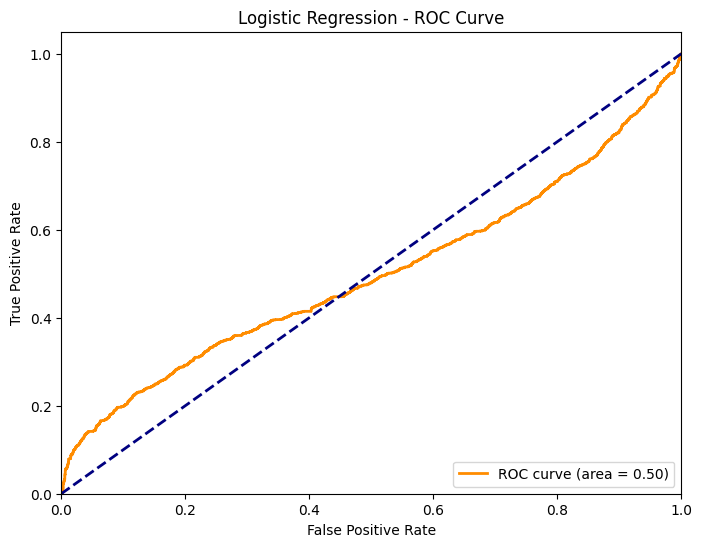

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_scores = best_model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc='lower right')
plt.show()

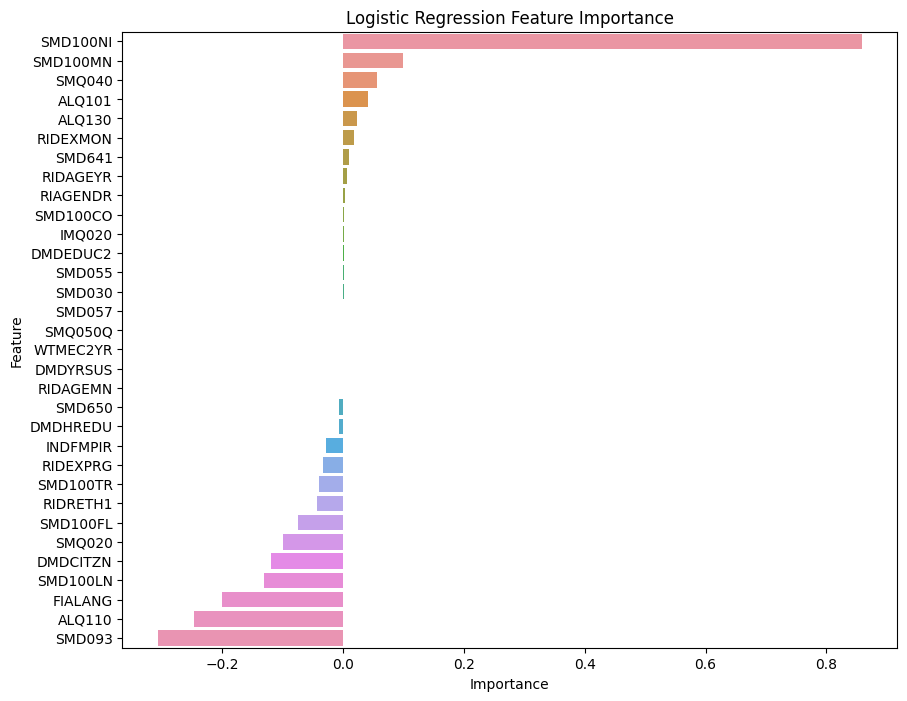

In [ ]:
import matplotlib.pyplot as plt


feature_importance = best_model.coef_[0]


importance_normalized = feature_importance / np.linalg.norm(feature_importance)


feature_names = X_train.columns


feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importance_normalized})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 300}
Accuracy: 0.9806784027479605


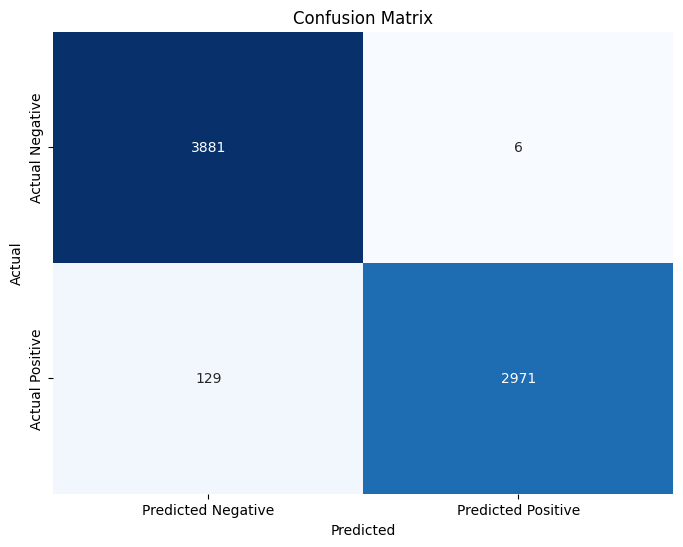

In [ ]:
#XGBoost (without over-sampling)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'min_child_weight': [1, 2, 3],
}



xgb_classifier = xgb.XGBClassifier()


grid_search = GridSearchCV(estimator = xgb_classifier, param_grid=param_grid, scoring='precision', cv=5)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


confusion = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


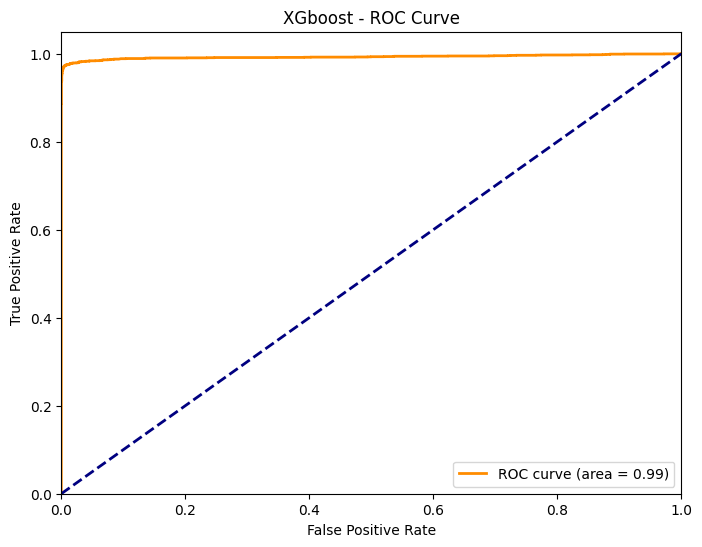

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_scores = best_model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_scores)


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGboost - ROC Curve')
plt.legend(loc='lower right')
plt.show()

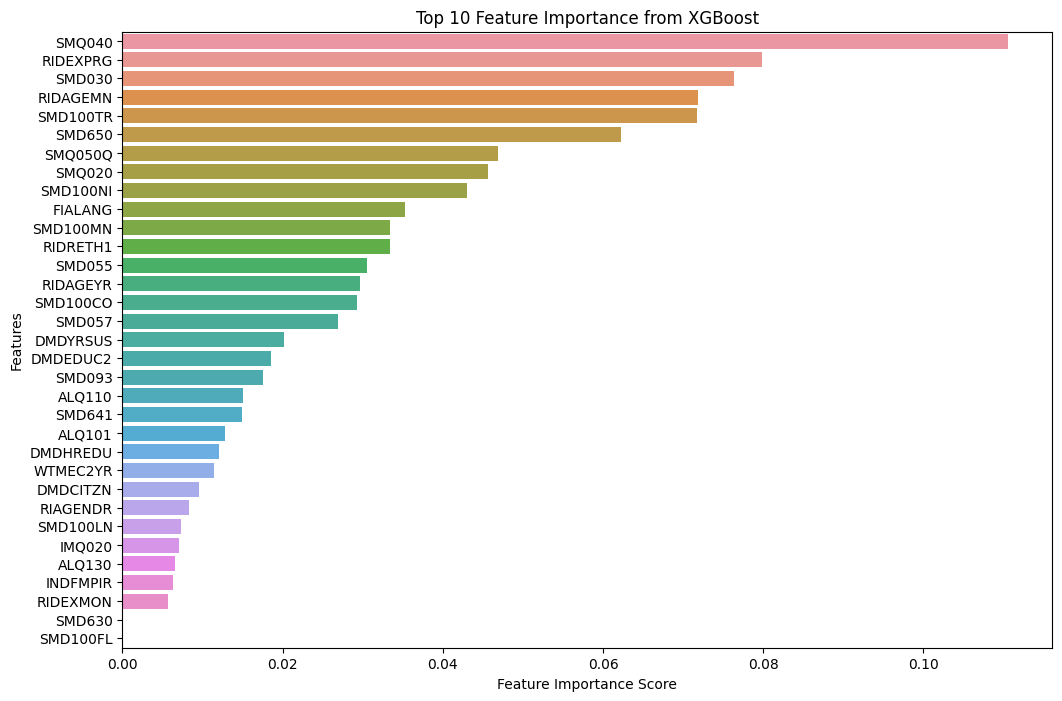

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


feature_importances = best_model.feature_importances_


feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})


feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Top 10 Feature Importance from XGBoost')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
print(classification_report(y_test, predictions))

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3887
           1       1.00      0.89      0.94      3100

    accuracy                           0.95      6987
   macro avg       0.96      0.95      0.95      6987
weighted avg       0.95      0.95      0.95      6987



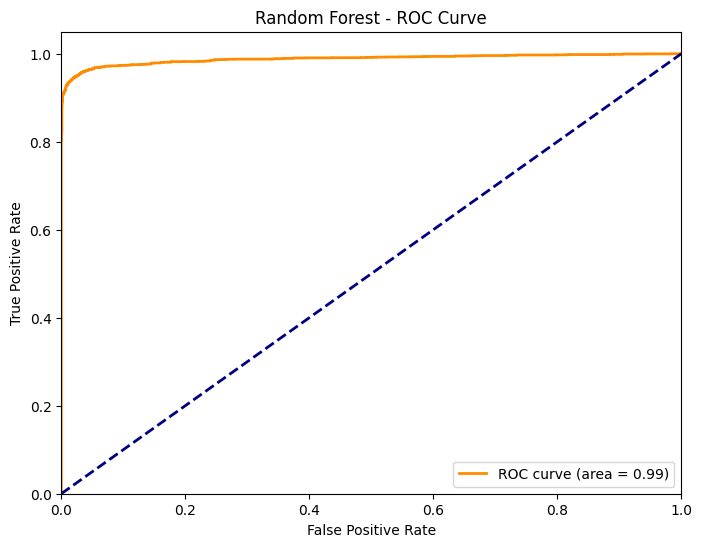

In [ ]:

y_scores = best_model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_scores)


roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.show()

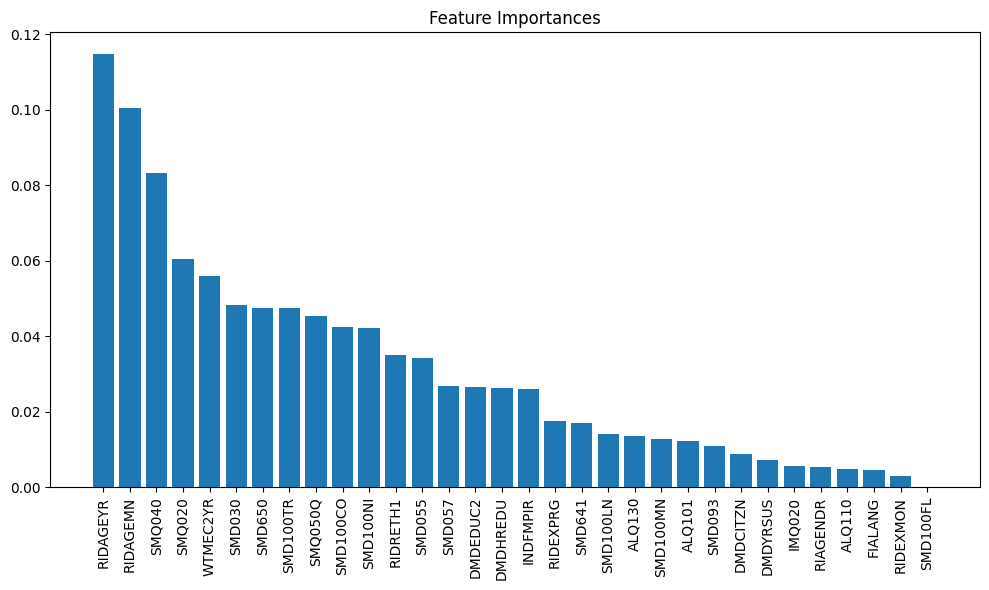

In [ ]:
# Get feature importances
importances = best_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
print('hi')